In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

path = '/mnt/d/project/IAVNNG/Data/'
file = 'GLO-MFC_001_030_mask_bathy.nc'
fn = path + file
ds = xr.open_dataset(fn)
display(ds)
# ds['deptho'].loc[-20:20,120:180].plot(vmin=5000,vmax=7000)

<xarray.Dataset> Size: 511MB
Dimensions:     (depth: 50, latitude: 2041, longitude: 4320)
Coordinates:
  * latitude    (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude   (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * depth       (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Data variables:
    mask        (depth, latitude, longitude) int8 441MB ...
    deptho      (latitude, longitude) float32 35MB ...
    deptho_lev  (latitude, longitude) float32 35MB ...
Attributes:
    title:                Bathymetry and mask for product GLOBAL_MULTIYEAR_PH...
    references:           http://marine.copernicus.eu
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    licence:              http://marine.copernicus.eu/services-portfolio/serv...
    contact:              servicedesk.cmems@mercator-ocean.eu
    producer:             CMEMS - Global Monitoring and Forecasting Centre
    institution:          Mercator Ocean
    Conventions:          CF-1.6
    area:                 GLOBAL
    source:               GLORYS12V1
    product_user_manual:  http://marine.copernicus.eu/documents/PUM/CMEMS-GLO...

5.71,8.86,17.14,39.58,98.29,244.38,562.91,1100.27,1713.03,2167.02,
[5.71409607e+00 1.45782871e+01 3.17150135e+01 7.12985229e+01
 1.69585022e+02 4.13967590e+02 9.76875854e+02 2.07714160e+03
 3.79017188e+03 5.95719531e+03]
5957.1953125


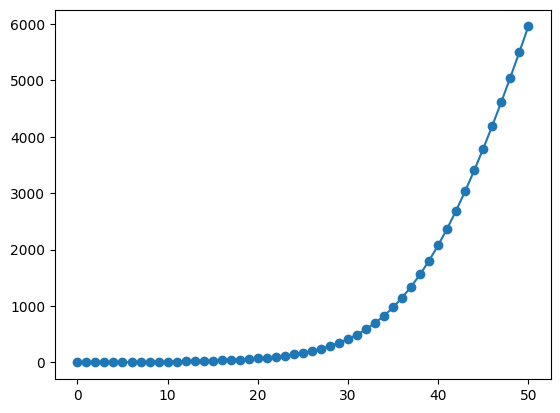

In [13]:
dep = ds['depth'].values
lev = [0]

for i in range(dep.size):
    lev.append(2*dep[i]-lev[-1])
lev = np.array(lev)
dr = lev[1:]-lev[:-1]
plt.plot(lev,marker='o')
# plt.plot(dr,dep)
drn = dr.reshape((10,5)).sum(axis=1)
levn = np.cumsum(drn)
drs = ''
for d in drn:
    drs += f'{d:.2f},'
print(drs)
print(levn)
print(drn.sum())